In [1]:
import time
import os
import tushare as ts
from datetime import datetime
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

sys.path.append("../utils/")
import date_util
import token_util
import enter_util
import stock_util

### 提取数据

In [ ]:
trade_date = "20190830"
delta_price = 30.0
stock_list = stock_util.get_stock_list(trade_date, delta_price)

In [3]:
stock_list = pd.read_csv("./data/data_{}.csv".format(trade_date))
stock_list.head()

,ts_code,name,price
0,000001.SZ,平安银行,14.145
1,000002.SZ,万科A,25.885
2,000004.SZ,国农科技,20.090
3,000005.SZ,世纪星源,3.135
4,000006.SZ,深振业A,5.360


### 选出符合入场点的股票

In [ ]:
# 选股

end_date = '20190930'
start_date = date_util.get_date_months_before(2, date=end_date)

pct_chg_short_discount = 0.25
pct_chg_long_discount = 0.25
his_macd_discount_discount = 0.25
amount_discount_discount = 0.25

golden_list = []

columns = {"stock_code", "pct_chg_short", "pct_chg_long", "his_macd_discount", "amount_discount"}
choose_list = pd.DataFrame(columns = columns)

for i in range(len(stock_list)):
    stock_code = stock_list.iloc[i]["ts_code"]
    
    try:
        ma2_1, ma2_2, ma5_1, ma5_2, amount_discount, ptc_chg = enter_util.cal_ma(stock_code, start_date, end_date)
        
        if ma2_1 < ma5_1 and ma2_2 > ma5_2 :
            
            golden_list.append(stock_code)
            macd, data_macd, his_macd_discount = enter_util.cal_macd(stock_code, end_date)
            list_tmp = pd.DataFrame([[stock_code, ptc_chg[0], ptc_chg[1], his_macd_discount, amount_discount]], columns=columns)
            
            if macd > 0:
                choose_list.append(list_tmp)
            
            if enter_util.negetive_macd_judge(data_macd) :
                choose_list.append(list_tmp)
    except:
        time.sleep(3)
        
# 排序

def get_rank_factor(arr):
    pct_chg_short = arr["pct_chg_short"] * pct_chg_short_discount
    pct_chg_long = arr["pct_chg_long"] * pct_chg_long_discount
    his_macd_discount = arr["his_macd_discount"] * his_macd_discount_discount
    amount_discount = arr["amount_discount"] * amount_discount_discount
    return pct_chg_short+pct_chg_long+his_macd_discount+amount_discount

choose_list["rank_factor"] = choose_list.apply(get_rank_factor, axis = 1)

In [ ]:
choose_list_copy = choose_list.copy()
choose_list_copy.sort_values(by="rank_factor", ascending= False).reset_index(drop=True)

### TEST

In [91]:
last_m2, last_m5 = df.iloc[0]['ma2'], df.iloc[0]['ma5']
this_m2, this_m5 = 0, 0
golden_port = []

def transform_date(date):
    date_list = list(date)
    date_list.insert(4, "-")
    date_list.insert(7, "-")
    date = "".join(date_list)
    
    return date
    
for i in range(1, len(df)):
    
    this_m2, this_m5 = df.iloc[i]['ma2'], df.iloc[i]['ma5']
    
    if last_m2 < last_m5 and this_m2 > this_m5 :
        date = df.iloc[i]['trade_date']
        date = transform_date(date)
        golden_port.append(date)

    last_m2, last_m5 = this_m2, this_m5

In [92]:
golden_port

['2018-01-23',
 '2018-02-13',
 '2018-03-02',
 '2018-03-06',
 '2018-03-15',
 '2018-03-30',
 '2018-04-19',
 '2018-04-24',
 '2018-05-02',
 '2018-05-16',
 '2018-05-23',
 '2018-05-28',
 '2018-06-12',
 '2018-06-22',
 '2018-07-02',
 '2018-07-10',
 '2018-07-25',
 '2018-08-01',
 '2018-08-10',
 '2018-08-22',
 '2018-09-17',
 '2018-10-15',
 '2018-10-22',
 '2018-11-01',
 '2018-11-12',
 '2018-11-29',
 '2018-12-12',
 '2018-12-25']

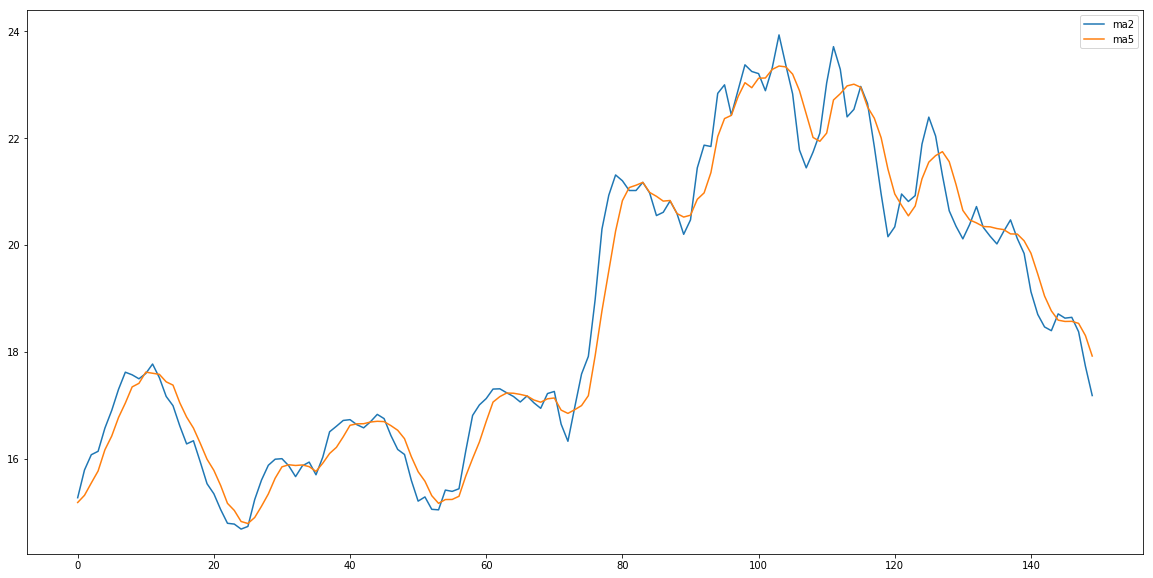

In [93]:
plt.figure(figsize=(20, 10))
plt.plot(df['ma2'].values[: 150], label="ma2")
plt.plot(df['ma5'].values[: 150], label="ma5")
plt.legend()
plt.show()

In [81]:
df.iloc[0]['trade_date']

'20180108'

In [33]:
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,ma2,ma_v_2,ma5,ma_v_5
242,603369.SH,20180102,15.4888,15.5085,15.1924,15.3604,15.3209,0.0395,0.2578,78368.43,121277.407,NaN,NaN,NaN,NaN
241,603369.SH,20180103,15.3505,15.3604,14.8665,14.9554,15.3604,-0.4050,-2.6367,174269.56,264912.782,15.1579,126318.995,NaN,NaN
240,603369.SH,20180104,15.0048,15.2616,14.9652,15.0344,14.9554,0.0790,0.5282,137711.60,210769.377,14.9949,155990.580,NaN,NaN
239,603369.SH,20180105,15.1035,15.1233,14.8665,14.9949,15.0344,-0.0395,-0.2627,81000.54,122759.363,15.0146,109356.070,NaN,NaN
238,603369.SH,20180108,14.9652,15.5480,14.8270,15.5382,14.9949,0.5433,3.6232,170628.69,265130.393,15.2665,125814.615,15.1767,128395.764
237,603369.SH,20180109,15.4987,16.5655,15.4196,16.0321,15.5382,0.4939,3.1786,227185.73,369822.684,15.7851,198907.210,15.3110,158159.224
236,603369.SH,20180110,16.0123,16.4173,15.8049,16.1111,16.0321,0.0790,0.4928,169448.38,276234.146,16.0716,198317.055,15.5421,157194.988
235,603369.SH,20180111,16.1012,16.2494,15.8839,16.1605,16.1111,0.0494,0.3066,100570.07,164084.214,16.1358,135009.225,15.7674,149766.682
234,603369.SH,20180112,16.0222,17.2273,16.0222,16.9804,16.1605,0.8199,5.0735,208925.34,351381.892,16.5704,154747.705,16.1645,175351.642
233,603369.SH,20180115,16.9804,17.6916,16.6248,16.8223,16.9804,-0.1581,-0.9311,256876.56,446061.670,16.9013,232900.950,16.4213,192601.216
